In [1]:
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_69699/1385982817.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


          x1        x2  y
0   5.496714  8.301893  2
1   4.861736  6.849916  2
2   5.647689  8.475146  2
3   6.523030  9.379504  2
4   4.765847  7.584154  2
5   4.765863  8.462182  2
6   6.579213  8.141175  2
7   5.767435  7.290411  2
8   4.530526  6.104136  2
9   5.542560  8.777419  2
10  4.536582  7.568227  2
11  4.534270  7.140638  2
12  5.241962  7.837355  2
13  3.086720  5.485410  2
14  3.275082  7.760009  2
15  4.437712  7.183931  2
16  3.987169  6.856655  2
17  5.314247  8.155433  2
18  4.091976  7.152989  2
19  3.587696  6.645718  2


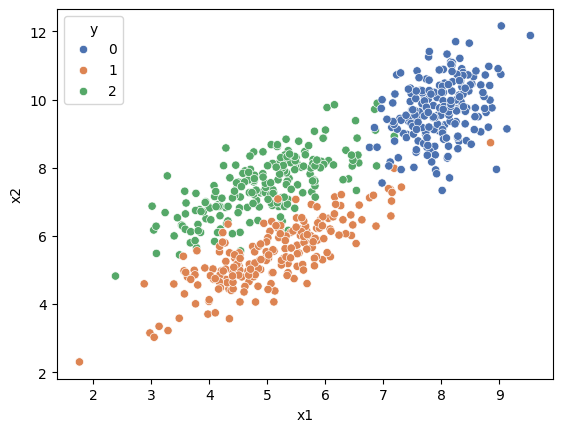

In [2]:
import pandas as pd
import seaborn as sns

np.random.seed(42)

def sep_line(x):
    return 0.7*x + 3

x11 = np.random.normal(loc= 5, scale= 1, size= 400)
x12 = np.random.normal(loc= 8, scale= 0.5, size= 200)
x1= np.concatenate((x11, x12))
x2 = [sep_line(x11[i]) + np.random.normal(loc= 1, scale= 0.6, size= 1)[0] for i in range(200)]
x3 = [sep_line(x11[i]) - np.random.normal(loc= 1, scale= 0.6, size= 1)[0] for i in range(200, 400)]
x4 = [sep_line(x1[i]) + np.random.normal(loc= 1, scale= 0.8, size= 1)[0] for i in range(400, 600)]
x2 = x2+x3+x4
y = [2 for i in range(200)] + [1 for i in range(200)] + [0 for i in range(200)]

data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
#data = data.sample(frac=1).reset_index(drop=True)

sns.scatterplot(x='x1', y='x2', hue='y', data=data, palette='deep')
print(data.head(20))


Since I am experimenting with KNN, I reduce the gap between randomly generated data.

In [3]:
class KNN:
    def __init__(self, k=5):
        self.k = k

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))
    
    def most_common(self, arr):
        return max(set(arr), key=arr.count)
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        neighbors = []
        for i in X_test:
            distances = [self.euclidean_distance(i, x) for x in self.X_train]
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(self.most_common(y_sorted[:self.k]))
        return neighbors
    
    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        return (predictions == y_test).mean()

    

    

<Axes: xlabel='x1', ylabel='x2'>

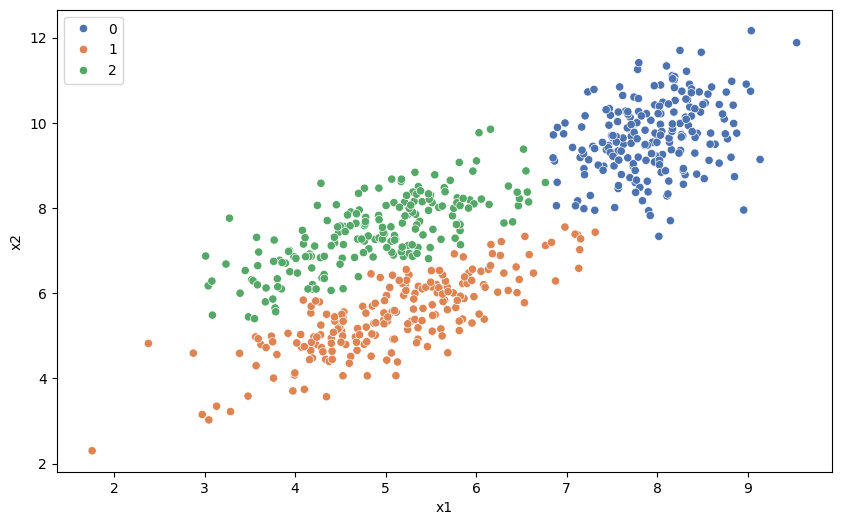

In [4]:
y = data['y'].values
X = data[['x1', 'x2']].values

knn = KNN(k=5)
knn.fit(X,y)
y_pred = knn.predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['x1'], y=data['x2'], hue=y_pred, palette='deep')

In [5]:
from sklearn.metrics import confusion_matrix


conmat = confusion_matrix(y, y_pred)
labels = ['Class 0', 'Class 1', 'Class 2'] 
conmat_df = pd.DataFrame(conmat, index=labels, columns=labels)


print(conmat_df)

         Class 0  Class 1  Class 2
Class 0      198        1        1
Class 1        2      192        6
Class 2        7        8      185


         x1        x2  y
0  6.057737  8.143060  2
1  5.306420  6.270934  1
2  4.229967  6.825143  2
3  6.561308  6.926595  1
4  2.910646  6.605024  2


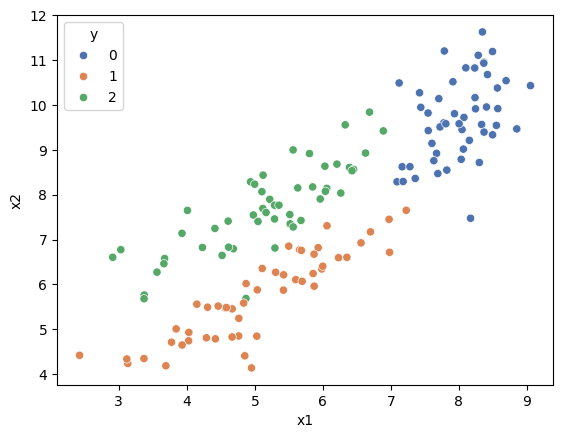

In [6]:
np.random.seed(24)


x11 = np.random.normal(loc= 5, scale= 1, size= 100)
x12 = np.random.normal(loc= 8, scale= 0.5, size= 50)
x1= np.concatenate((x11, x12))
x2 = [sep_line(x11[i]) + np.random.normal(loc= 1, scale= 0.6, size= 1)[0] for i in range(50)]
x3 = [sep_line(x11[i]) - np.random.normal(loc= 1, scale= 0.6, size= 1)[0] for i in range(50, 100)]
x4 = [sep_line(x1[i]) + np.random.normal(loc= 1, scale= 0.8, size= 1)[0] for i in range(100, 150)]
x2 = x2+x3+x4
test_y = [2 for i in range(50)] + [1 for i in range(50)] + [0 for i in range(50)]

test_data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': test_y})
test_data = test_data.sample(frac=1).reset_index(drop=True)

sns.scatterplot(x='x1', y='x2', hue='y', data=test_data, palette='deep')
print(test_data.head())

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02, ax=None):
    markers = ('o', 's', '^')
    colors = ('red', 'blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = np.array(lab).reshape(xx1.shape)
    if ax is None:
        plt.contourf(xx1, xx2, lab, alpha=0.2, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
    else:
        ax.contourf(xx1, xx2, lab, alpha=0.2, cmap=cmap)
        ax.set_xlim(xx1.min(), xx1.max())
        ax.set_ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        if ax is None:
            plt.scatter(x=X[y == cl, 0], 
                        y=X[y == cl, 1],
                        c=colors[idx],
                        marker=markers[idx], 
                        edgecolor='black')
        else:
            ax.scatter(x=X[y == cl, 0], 
                       y=X[y == cl, 1], 
                       c=colors[idx],
                       marker=markers[idx], 
                       edgecolor='black')

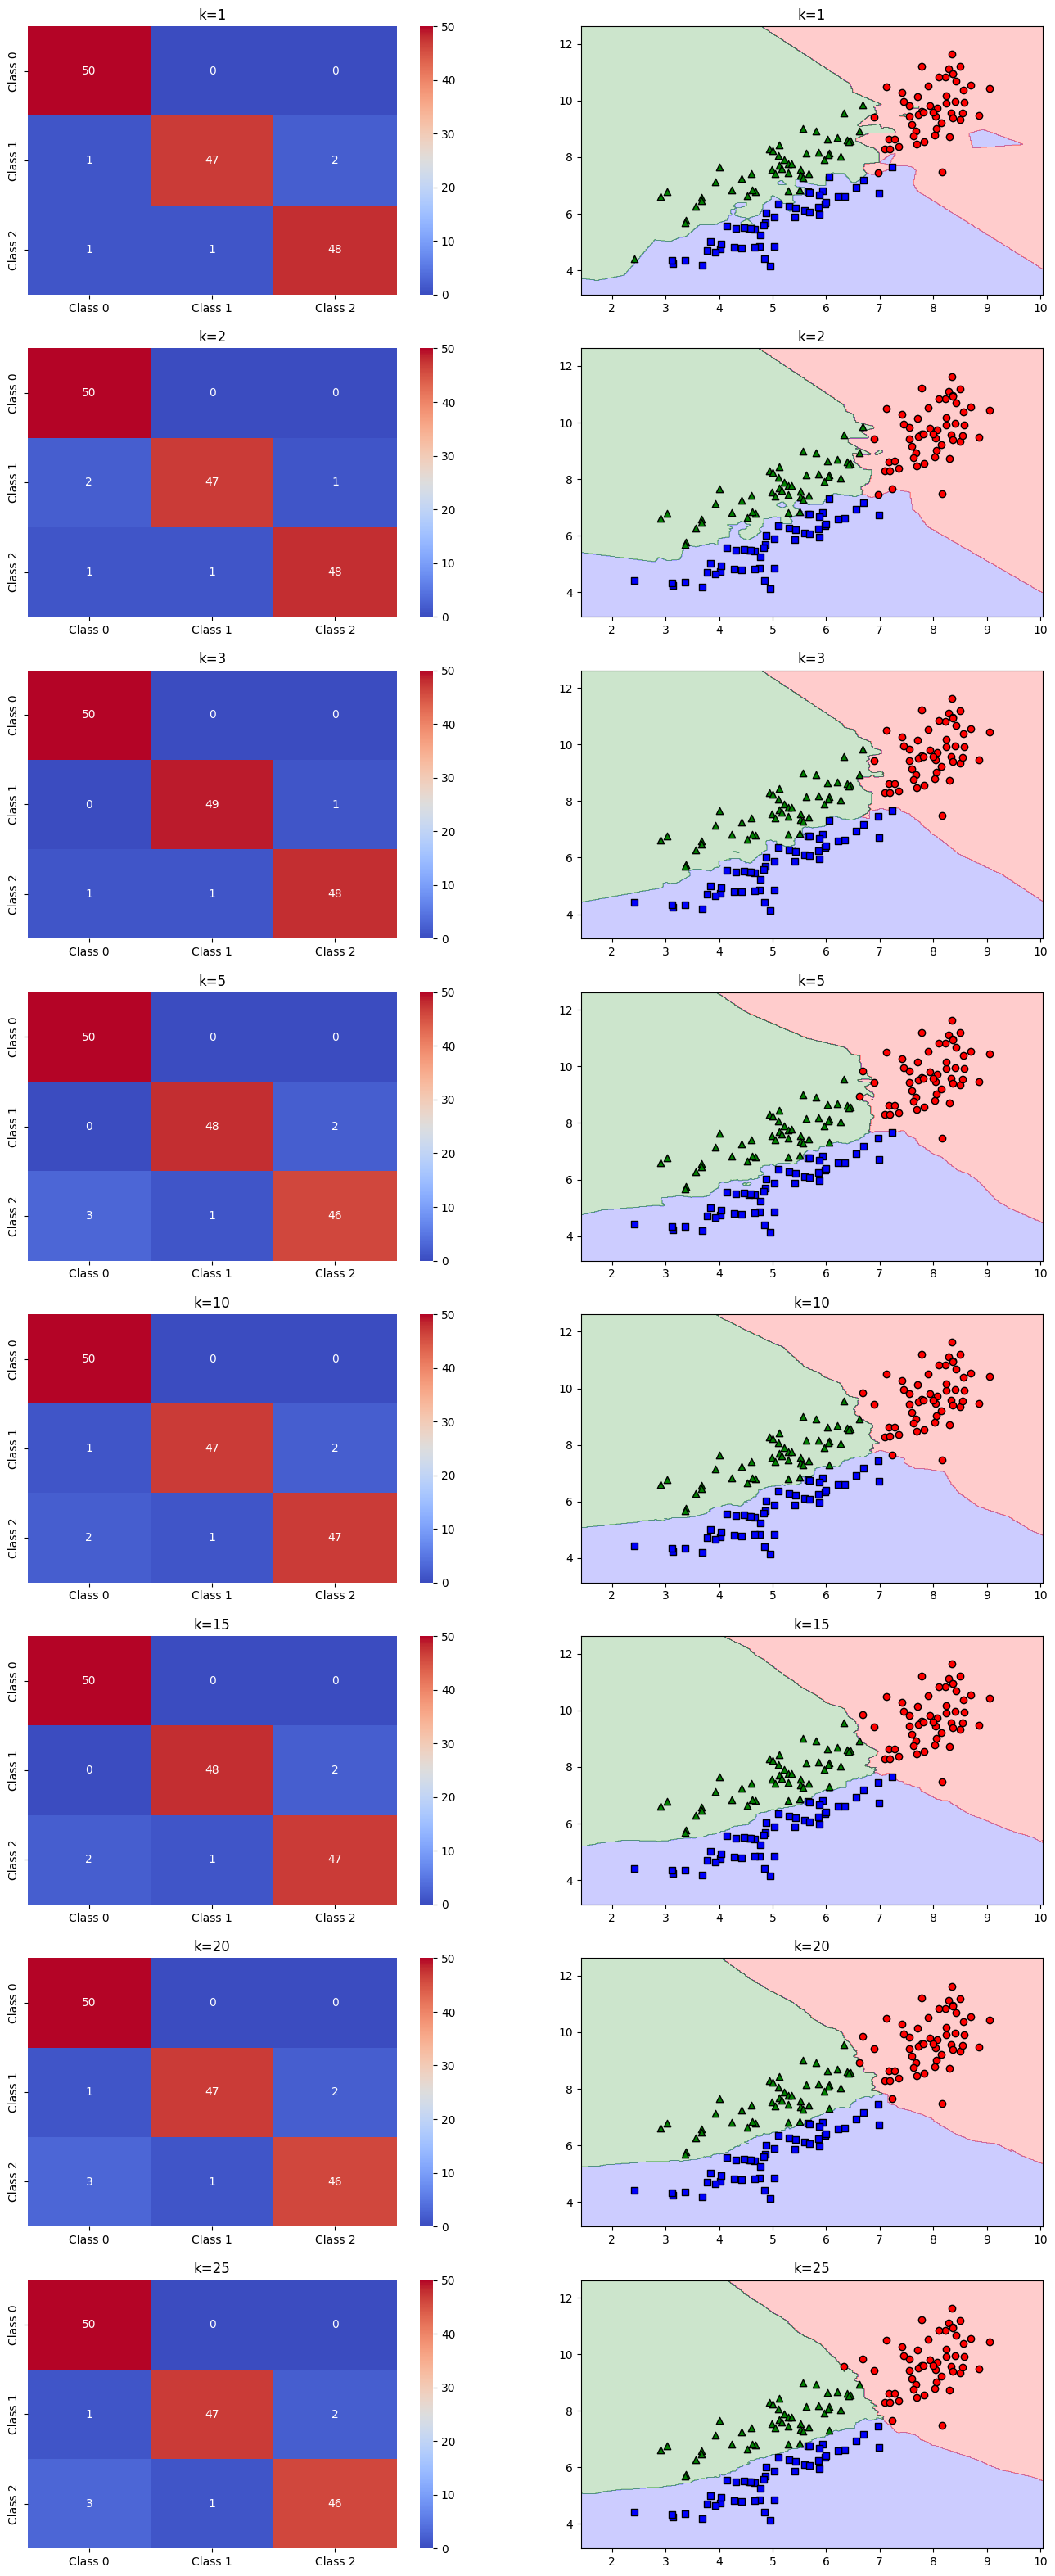

In [8]:
X_test = test_data[['x1', 'x2']].values
y_test = test_data['y'].values

neighbors = [1, 2, 3, 5, 10, 15, 20, 25]
i = 0
fig, ax = plt.subplots(8, 2, figsize=(16, 40))
for n in neighbors:
    knn = KNN(k=n)
    knn.fit(X, y)
    y_pred = knn.predict(X_test)
    conmat = confusion_matrix(y_test, y_pred)
    conmat_df = pd.DataFrame(conmat, index=labels, columns=labels)
    sns.heatmap(conmat_df, annot=True, ax=ax[i, 0], cmap='coolwarm', fmt='d')
    ax[i, 0].set_title(f'k={n}')
    plot_decision_regions(X_test, y_pred, knn, ax=ax[i, 1])
    ax[i, 1].set_title(f'k={n}')
    i += 1



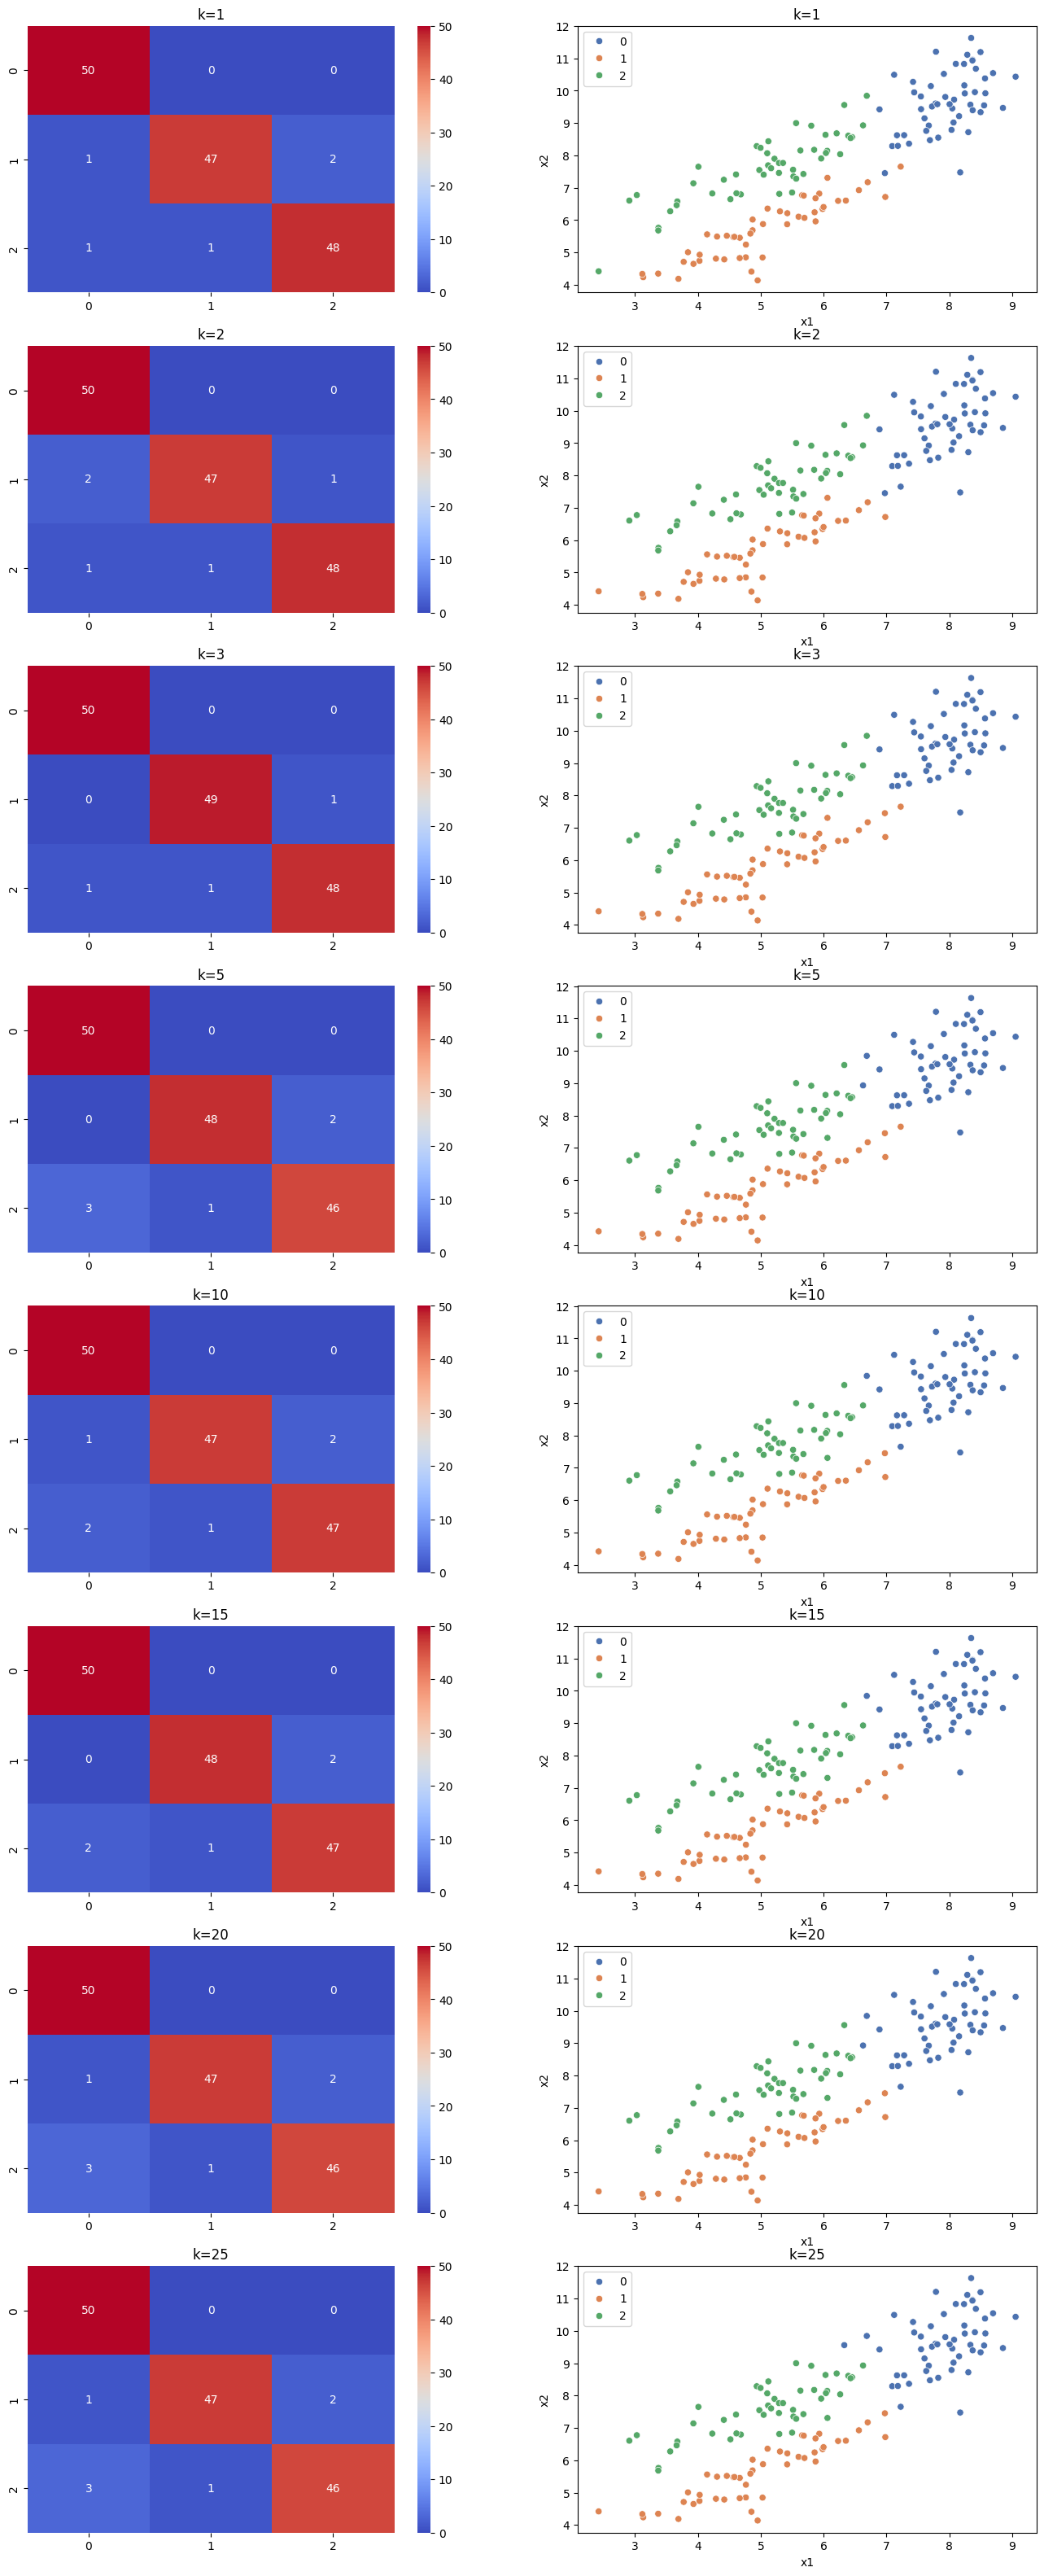

In [9]:
from sklearn.neighbors import KNeighborsClassifier

X_test = test_data[['x1', 'x2']].values
y_test = test_data['y'].values

labels = [0, 1, 2]  # Ensure this matches the unique classes in your target variable
i = 0
fig, ax = plt.subplots(8, 2, figsize=(16, 40))
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X, y)
    y_pred = knn.predict(X_test)
    conmat = confusion_matrix(y_test, y_pred, labels=labels)
    conmat_df = pd.DataFrame(conmat, index=labels, columns=labels)
    sns.heatmap(conmat_df, annot=True, ax=ax[i, 0], cmap='coolwarm', fmt='d')
    ax[i, 0].set_title(f'k={n}')
    sns.scatterplot(x=test_data['x1'], y=test_data['x2'], hue=y_pred, palette='deep', ax=ax[i, 1])
    ax[i, 1].set_title(f'k={n}')
    i += 1